In [1]:
%load_ext lab_black
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from cartopy import crs as ccrs

In [3]:
path = gpd.datasets.get_path("naturalearth_lowres")
df = gpd.read_file(path)

In [4]:
airports = pd.read_csv("airports.csv")  # https://ourairports.com/data/

In [5]:
airports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR


In [6]:
airports_gdf = gpd.GeoDataFrame(
    airports,
    geometry=gpd.points_from_xy(airports.longitude_deg, airports.latitude_deg),
    crs="epsg:4326",
)

<AxesSubplot:>

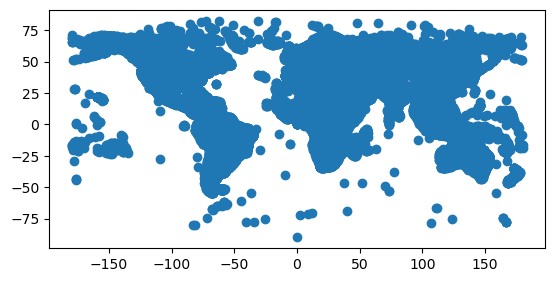

In [7]:
airports_gdf.plot()

<AxesSubplot:>

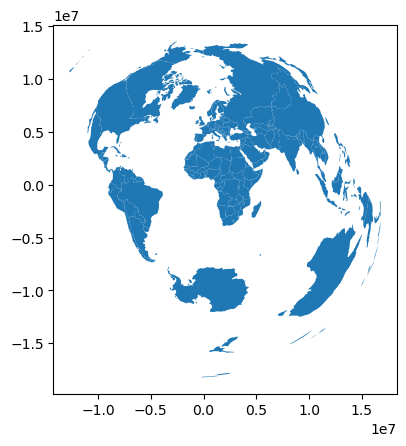

In [8]:
crs = ccrs.AzimuthalEquidistant()
crs_proj4 = crs.proj4_init
df_ae = df.to_crs(crs_proj4)
df_ae.plot()

In [9]:
def get_projection(longitude):
    return ccrs.AzimuthalEquidistant(central_longitude=longitude)

In [10]:
def get_gdfs(df, airports_gdf, longitude):
    crs = ccrs.AzimuthalEquidistant(central_longitude=longitude)
    crs_proj4 = crs.proj4_init
    return (df.to_crs(crs_proj4), airports_gdf.to_crs(crs_proj4))

In [11]:
def ax_ops(ax):
    ax.axis("off")
    ax.margins(0)
    ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

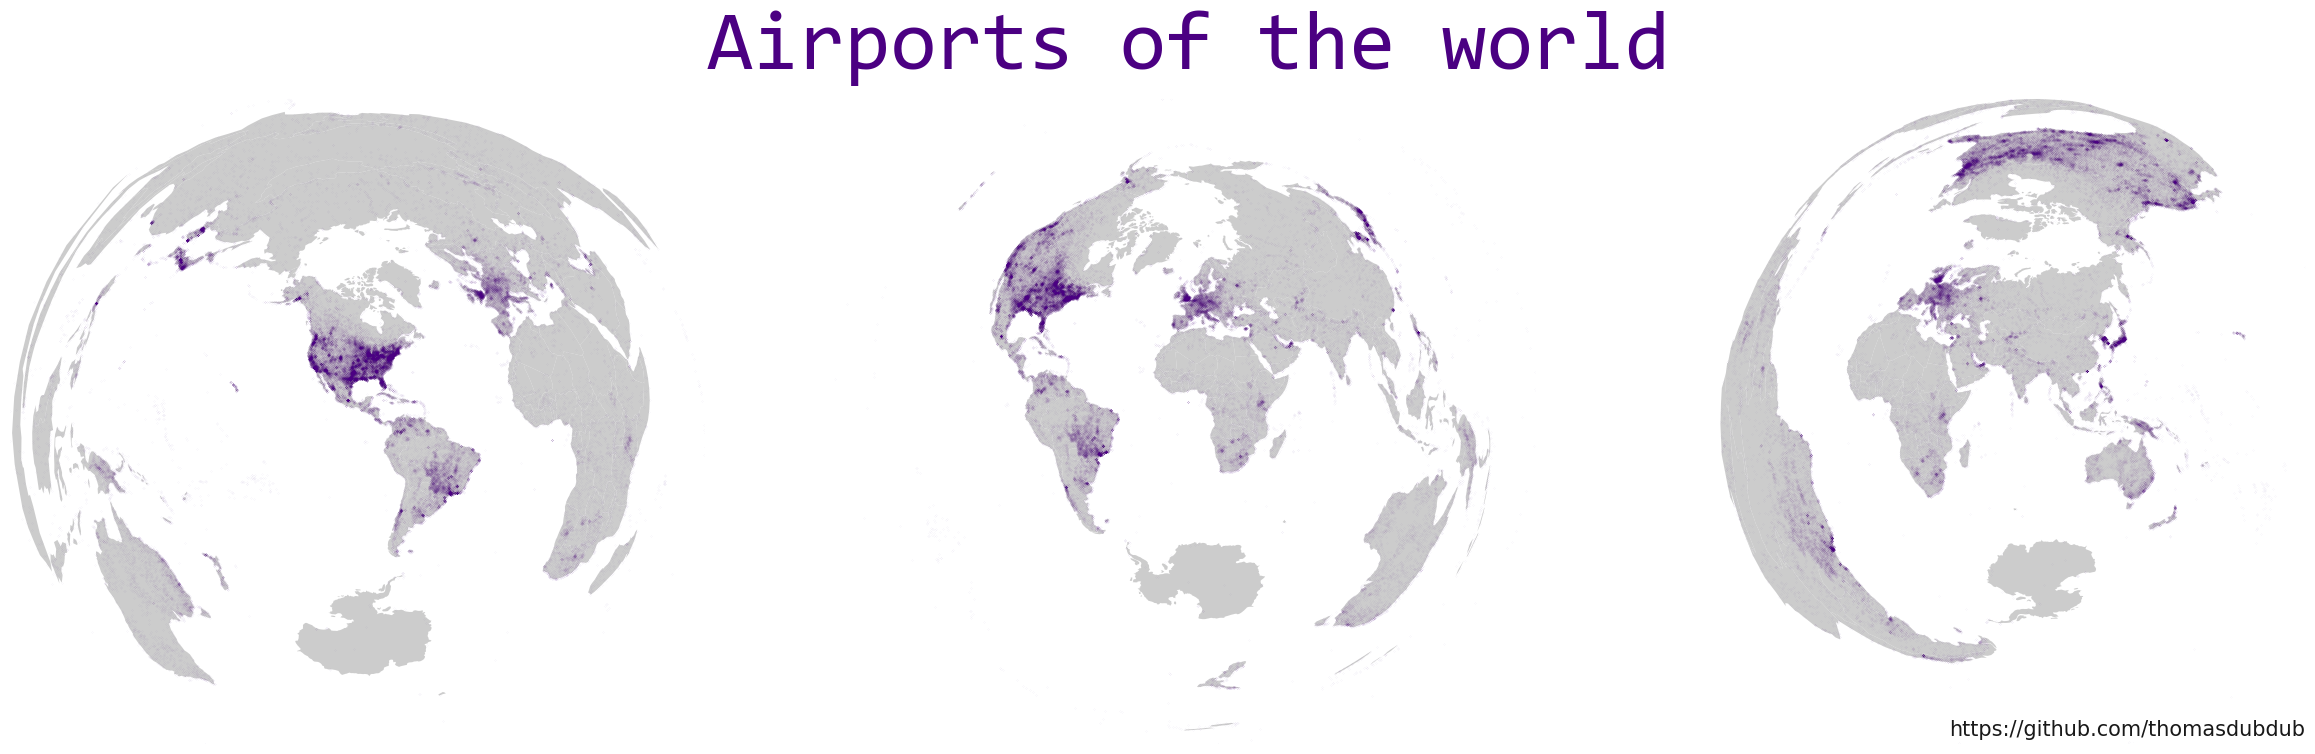

In [12]:
f = plt.figure(figsize=(25, 8))

ax1 = f.add_subplot(1, 3, 1, projection=get_projection(-90.0))
ax2 = f.add_subplot(1, 3, 2, projection=get_projection(0.0))
ax3 = f.add_subplot(1, 3, 3, projection=get_projection(90.0))

df1, airports_df1 = get_gdfs(df, airports_gdf, -90.0)
df2, airports_df2 = get_gdfs(df, airports_gdf, 0.0)
df3, airports_df3 = get_gdfs(df, airports_gdf, 90.0)

msize = 0.001
col = "indigo"
df1.plot(ax=ax1, color="silver", alpha=0.8)
airports_df1.plot(ax=ax1, marker=".", markersize=msize, color=col)
df2.plot(ax=ax2, color="silver", alpha=0.8)
airports_df2.plot(ax=ax2, marker=".", markersize=msize, color=col)
df3.plot(ax=ax3, color="silver", alpha=0.8)
airports_df3.plot(ax=ax3, marker=".", markersize=msize, color=col)

f.suptitle("Airports of the world", fontsize=60, fontname="Consolas", color=col, y=0.95)

plt.title(
    "https://github.com/thomasdubdub",
    fontsize=15,
    color="black",
    alpha=0.9,
    y=0.0,
    loc="right",
)
ax_ops(ax1)
ax_ops(ax2)
ax_ops(ax3)

plt.tight_layout()
plt.savefig("airports.png", dpi=300, bbox_inches="tight", pad_inches=0)